# Implementasi model prediksi suhu minimum dengan metode Linear Regression

# 1. Business Understanding
#### Tujuan: Meramalkan suhu minimum berdasarkan data harian.

# 2. Data Understanding
#### Data: daily_min_temp.csv dengan atribut:
#### Date: Tanggal pengukuran.
#### Temp: Suhu minimum harian (label).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('daily_min_temp.csv')

In [3]:
# Data Understanding
# Display first few rows of the training data
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
data.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


# 3. Data Preparation
#### Windowing Data: Membuat fitur tambahan berdasarkan nilai suhu dalam beberapa hari sebelumnya (ukuran jendela = 4)
#### Split Data: Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [6]:
# Membuat fitur lagged (ukuran jendela = 4)
# Ukuran jendela menentukan berapa banyak langkah waktu yang akan digunakan untuk membuat fitur lagged
window_size = 4

# Looping untuk membuat fitur lagged dari 1 hingga ukuran jendela
for i in range(1, window_size + 1):
    # Membuat fitur lagged dengan nama 'Lag_{i}' dan nilai yang di-shift sebesar 'i' langkah waktu
    data[f'Lag_{i}'] = data['Temp'].shift(i)

In [7]:
# Menghapus baris dengan nilai NaN dan reset index
# Dropna() digunakan untuk menghapus baris dengan nilai NaN
# Reset_index(drop=True) digunakan untuk reset index setelah menghapus baris
data = data.dropna().reset_index(drop=True)

In [8]:
# Membuat dataset X (fitur) dan y (target)
# X terdiri dari fitur lagged yang dibuat sebelumnya
X = data[[f'Lag_{i}' for i in range(1, window_size + 1)]]

# y adalah target yang ingin diprediksi, yaitu nilai 'Temp'
y = data['Temp']

In [9]:
# Membagi dataset menjadi training set dan testing set
# test_size=0.2 berarti 20% dari dataset akan digunakan sebagai testing set
# random_state=42 untuk memastikan hasil pembagian dataset sama setiap kali dijalankan
# shuffle=False untuk tidak mengacak urutan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 4. Modelling
#### Membuat model regresi linear untuk prediksi suhu.

In [10]:
# Modeling: Linear Regression
# Modeling: Linear Regression
# Membuat instance baru dari model regresi linear
model = LinearRegression()

# Melatih model menggunakan data training
# X_train: data fitur (independen)
# y_train: data target (dependen)
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Membuat prediksi pada data tes
# Menggunakan model yang telah dilatih sebelumnya untuk memprediksi nilai target (y) 
# berdasarkan data fitur (X) pada dataset tes
y_pred = model.predict(X_test)

# 5. Evaluation
#### Menggunakan metrik seperti MAE dan RMSE untuk mengevaluasi model.


In [12]:
# Menghitung metrik evaluasi
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
# np.sqrt digunakan untuk menghitung akar kuadrat
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [13]:
# Display evaluation metrics
evaluation_results = {
    "Mean Absolute Error (MAE)": round(mae,2),
    "Root Mean Squared Error (RMSE)": round(rmse,2)
}

# Return evaluation results
evaluation_results

{'Mean Absolute Error (MAE)': np.float64(1.8),
 'Root Mean Squared Error (RMSE)': np.float64(2.29)}

# 6. Deployment
#### Menampilkan hasil prediksi dalam bentuk visualisasi.

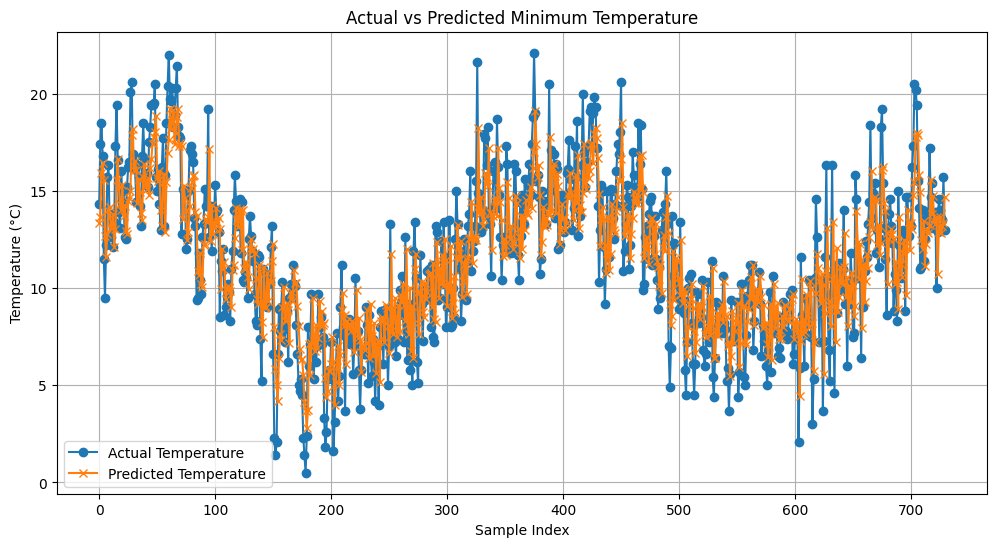

In [14]:
# Visualisasi Aktual vs Prediksi Suhu
# Membuat plot untuk membandingkan nilai aktual dan prediksi
plt.figure(figsize=(12, 6))

# Plot nilai aktual dengan label 'Actual Temperature' dan marker 'o'
plt.plot(y_test.values, label='Actual Temperature', marker='o')

# Plot nilai prediksi dengan label 'Predicted Temperature' dan marker 'x'
plt.plot(y_pred, label='Predicted Temperature', marker='x')

# Menambahkan judul plot
plt.title('Actual vs Predicted Minimum Temperature')

# Menambahkan label pada sumbu x
plt.xlabel('Sample Index')

# Menambahkan label pada sumbu y
plt.ylabel('Temperature (°C)')

# Menambahkan legenda
plt.legend()

# Menambahkan grid pada plot
plt.grid()

# Menampilkan plot
plt.show()